<a href="https://colab.research.google.com/github/Lanzero225/Python-Notebooks/blob/main/Philippine%20Weather/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Philippine Weather Analysis (2025)

The Philippines is a tropical country located in Southeast Asia, situated near the equator and along the western Pacific Ocean. Due to its geographic location, the country experiences highly variable weather conditions and is frequently affected by tropical storms and typhoons.

This analysis aims to examine historical weather data from the past two years across different locations in the Philippines. By analyzing key weather variables such as temperature, weather conditions, and other attributes, this study seeks to identify patterns, seasonal trends, and extreme weather occurrences. The insights derived from this analysis may help in understanding the country’s weather behavior and its implications for disaster preparedness, urban planning, and climate-related decision-making.



# Data Importing

To begin first, I will import the necessary libraries to begin this analysis.

In [78]:
import pandas as pd
import numpy as np

The dataset used for this analysis uses a dataset from Kaggle:
- https://www.kaggle.com/datasets/bwandowando/philippine-major-cities-weather-data-2025

The data here is gathered from:
- https://openweathermap.org

The 2025 dataset gathers records in 1-hour intervals.

First, let us begin by loading the dataset. I uploaded the dataset to my personal repository for easy access, which can be accessed with:
- "https://raw.githubusercontent.com/Lanzero225/Python-Notebooks/main/Philippine%20Weather/Data/{YYYY-MM}_CombinedData.csv"

After which, the csv file will be converted into a DataFrame and aggregated into a singular DataFrame.

In [79]:

directories = pd.period_range('2025-01', '2025-12', freq='M').strftime('%Y%m').tolist()
dfs = []

for i in directories:
    url = (
        "https://raw.githubusercontent.com/"
        "Lanzero225/Python-Notebooks/main/"
        f"Philippine%20Weather/Data/{i}_CombinedData.csv"
    )
    dfs.append(pd.read_csv(url))

weather_dataframe = pd.concat(dfs, ignore_index=True)


Looking initially into the code, we see that there are columns with missing values and mismatched datatypes.

Missing Columns:
- visibility
- wing.gust
- rain.1h

Datatype Mismatch:
- datetime
- sys.sunrise
- sys.sunset

In [80]:
weather_dataframe.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066627 entries, 0 to 1066626
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   visibility           1065372 non-null  float64
 1   datetime             1066627 non-null  object 
 2   main.temp            1066627 non-null  float64
 3   main.feels_like      1066627 non-null  float64
 4   main.temp_min        1066627 non-null  float64
 5   main.temp_max        1066627 non-null  float64
 6   main.pressure        1066627 non-null  float64
 7   main.humidity        1066627 non-null  float64
 8   main.sea_level       1066627 non-null  float64
 9   main.grnd_level      1066627 non-null  float64
 10  wind.speed           1066627 non-null  float64
 11  wind.deg             1066627 non-null  float64
 12  wind.gust            900218 non-null   float64
 13  clouds.all           1066627 non-null  float64
 14  sys.sunrise          1066627 non-null  object 
 15

In [81]:
weather_dataframe.head()

,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h
0,10000.0,2025-01-01 00:06:01+08:00,26.33,26.33,26.33,26.33,1011.0,80.0,1011.0,1005.0,3.48,131.0,5.79,85.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Clouds,overcast clouds,Alaminos,NaN
1,10000.0,2025-01-01 00:06:02+08:00,26.25,26.25,26.25,26.25,1012.0,83.0,1012.0,994.0,1.03,200.0,NaN,40.0,2025-01-01 06:23:37+08:00,2025-01-01 17:38:18+08:00,Clouds,scattered clouds,Angeles City,NaN
2,10000.0,2025-01-01 00:06:03+08:00,23.26,24.04,23.26,23.26,1012.0,92.0,1012.0,972.0,2.83,78.0,4.06,74.0,2025-01-01 06:22:02+08:00,2025-01-01 17:35:01+08:00,Clouds,broken clouds,Antipolo,NaN
3,10000.0,2025-01-01 00:06:04+08:00,24.69,25.59,24.69,24.69,1010.0,91.0,1010.0,1001.0,3.07,29.0,5.69,100.0,2025-01-01 06:06:41+08:00,2025-01-01 17:31:50+08:00,Clouds,overcast clouds,Bacolod,NaN
4,10000.0,2025-01-01 00:04:30+08:00,27.21,31.11,26.13,28.03,1011.0,88.0,1011.0,1008.0,1.54,130.0,NaN,75.0,2025-01-01 06:20:59+08:00,2025-01-01 17:38:10+08:00,Clouds,broken clouds,Bacoor,NaN


## Data Definition

Let's dive deep into each of the columns in this dataset.

These are the columns that refer to location and time:
- datetime - Date and time of current tracked weather.
- coord.lon - Longitude coordinate of city.
- coord.lat - Latitude coordinate of city.
- city_name - Name of the city.
  - e.g Alaminos, 119.9811, 16.1561
- sys.sunrise - Date and time of a city's sunrise
- sys.sunset - Date and timeof a city's sunset
  - e.g 2023-11-06 05:58:51+08:00

The following describe the basic weather signal units:
- visibility - Measure of distance at which objects can be discerned (0 to 10 km).
- main.temp - Temperature in Celsius.
- main.feels_like - Human perception of temperature in Celsius.
- main.pressure/main.sea_level - Atmospheric pressure on the sea level, hPa.
= main.grnd_level - Atmospheric pressure on the ground level, hPa
- main.humidity - Percentage of humidity.
- main.temp_min - Minimum temperature at the moment.
- main.temp_max - Maximum temperature at the moment.
- wind.speed - Wind speed in meter/sec (m/s).
- wind.deg - Wind direction in meteorological degrees
- wind.gust - Wind gust in meter/sec (m/s).
- clouds.all - Percentage of cloudiness
- rain.1h - Pecipitation in milimmeter/hour (mm/h).

The following describe basic weather labels:
- weather.main - Refers to the category of weather for that record.
- weather.description - Refers to the subtype of weather under that record.

Lastly, the following refer to the system data that is used while extracting data:
- sys.id - Internal parameter
- sys.type - Internal parameter
- extraction_date_time - Date and timestamp of when the system extracted the record.
- weather.id - Integer value referring to the ID corresponding to the specific weather description.
  - 201 -> thunderstorm with rain
- weather.icon - Corresponding icon associated with weather.description.

In [82]:
categorical_weather_labels = ['weather.main','weather.description']
time_location_labels = ['datetime','sys.sunrise','sys.sunset','coord.lat','coord.lon','city_name']
weather_signal_labels = [
    'main.temp','main.feels_like','main.temp_min','main.temp_max',
    'main.pressure','main.humidity','main.sea_level','main.grnd_level',
    'wind.speed','wind.deg','wind.gust','clouds.all','visibility','rain.1h'
]

# Data Preparation

Now that we've defined the columns found inside the dataset, we can begin the next stage of the analysis, data preparation. First, let us try and sort the dataset by date and city.

In [83]:
weather_dataframe = weather_dataframe.sort_values(by=['city_name', 'datetime']).reset_index(drop=True)
weather_dataframe_original = weather_dataframe.copy()
weather_dataframe


,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h
0,10000.0,2025-01-01 00:06:01+08:00,26.33,26.33,26.33,26.33,1011.0,80.0,1011.0,1005.0,3.48,131.0,5.79,85.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Clouds,overcast clouds,Alaminos,NaN
1,10000.0,2025-01-01 02:06:00+08:00,26.30,26.30,26.30,26.30,1010.0,74.0,1010.0,1004.0,4.05,136.0,6.30,73.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Clouds,broken clouds,Alaminos,NaN
2,10000.0,2025-01-01 04:06:01+08:00,26.16,26.16,26.16,26.16,1009.0,75.0,1009.0,1004.0,4.35,124.0,6.38,70.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Clouds,broken clouds,Alaminos,NaN
3,10000.0,2025-01-01 06:06:00+08:00,25.75,26.39,25.75,25.75,1010.0,77.0,1010.0,1004.0,3.84,105.0,5.26,62.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Rain,light rain,Alaminos,0.21
4,10000.0,2025-01-01 08:06:00+08:00,26.66,26.66,26.66,26.66,1011.0,76.0,1011.0,1006.0,4.75,105.0,6.71,63.0,2025-01-01 06:27:51+08:00,2025-01-01 17:38:52+08:00,Clouds,broken clouds,Alaminos,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066622,10000.0,2025-12-31 19:04:16+08:00,26.99,30.00,26.99,26.99,1007.0,83.0,1007.0,984.0,1.03,0.0,NaN,75.0,2025-12-31 06:02:39+08:00,2025-12-31 17:46:12+08:00,Clouds,broken clouds,Zamboanga City,NaN
1066623,10000.0,2025-12-31 20:04:18+08:00,27.99,32.54,27.99,27.99,1008.0,83.0,1008.0,985.0,1.54,50.0,NaN,75.0,2025-12-31 06:02:39+08:00,2025-12-31 17:46:12+08:00,Clouds,broken clouds,Zamboanga City,NaN
1066624,10000.0,2025-12-31 21:04:12+08:00,26.99,30.60,26.99,26.99,1008.0,89.0,1008.0,985.0,1.03,80.0,NaN,40.0,2025-12-31 06:02:39+08:00,2025-12-31 17:46:12+08:00,Clouds,scattered clouds,Zamboanga City,NaN
1066625,10000.0,2025-12-31 22:04:09+08:00,26.99,30.60,26.99,26.99,1009.0,89.0,1009.0,984.0,2.06,80.0,NaN,75.0,2025-12-31 06:02:39+08:00,2025-12-31 17:46:12+08:00,Clouds,broken clouds,Zamboanga City,NaN


## Data Normalization

As stated prior, the following columns are of object type and not datetime type. To fix this first, let us change their datatype

In [84]:
time_labels = ['datetime', 'sys.sunrise', 'sys.sunset']
for col in time_labels:
    if col in weather_dataframe.columns:
        weather_dataframe[col] = pd.to_datetime(weather_dataframe[col], errors='coerce')


## Filling in Missing Values

With column removal done, we can look into filling in null values, which include the following:
- visibility
- wind.gust
- rain.1h

Let us first begin with filling in visibility and wind gust. A custom interpolation function was implemented that operates on a per-city basis. The dataset is first sorted by city_name and datetime to preserve the correct temporal sequence of observations.

For each column, the data is grouped by city. To ensure temporal sequence of data and linearity, I applied linear interpolation. This estimates missing values based on surrounding timestamps. Say we have two non-null datapoints, A and B, with any number of null values in between. Linear interpolation draws a line between those two, line AB, and plots the null values in between, filling the null values.

In [85]:
def interpolate_columns_by_city(df, columns, method='linear'):
    for col in columns:
        df[col] = (
            df.groupby('city_name')[col]
              .transform(lambda s: s.interpolate(method=method, limit_direction='both'))
        )
    return df

weather_dataframe = interpolate_columns_by_city(
    weather_dataframe,
    ['visibility']
)

For wind gust, we have to first consider the values before imputating. A simple linear interpolation might lead to high gust values provided a null value lies between a very large wind gust value. As such, wind gust values used a forward fill and backward fill approach to mitigate the influence of rare extreme events and to avoid propagating high gust values during interpolation.

In [86]:
weather_dataframe['wind.gust'] = (
    weather_dataframe
      .sort_values(['city_name', 'datetime'])
      .groupby('city_name')['wind.gust']
      .transform(lambda s: s.ffill().bfill())
)


Next, rain.1h indicates the precipitation experienced for that specific hour. If there is rain, it records the precipitation value in mm/h, otherwise, it doesn't record anything, or NaN. To circumvent this, let us populate all null values with 0.

In [88]:
weather_dataframe = weather_dataframe.fillna(0)
weather_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066627 entries, 0 to 1066626
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype                    
---  ------               --------------    -----                    
 0   visibility           1066627 non-null  float64                  
 1   datetime             1066627 non-null  datetime64[ns, UTC+08:00]
 2   main.temp            1066627 non-null  float64                  
 3   main.feels_like      1066627 non-null  float64                  
 4   main.temp_min        1066627 non-null  float64                  
 5   main.temp_max        1066627 non-null  float64                  
 6   main.pressure        1066627 non-null  float64                  
 7   main.humidity        1066627 non-null  float64                  
 8   main.sea_level       1066627 non-null  float64                  
 9   main.grnd_level      1066627 non-null  float64                  
 10  wind.speed           1066627 non-null  flo



---



## Outlier Detection

Now that we've completed imputation and normalization, let us analyze each column to look for outliers.

---



### Domain Outliers

Now is the time to see if there are any columns that go past beyond their logical point. Features that are defined to be represented with upper and/or lower bounds should be checked. As seen below, the features humidity, clouds, wind degrees, rain, and visisbility are all valid.

In [89]:
df = weather_dataframe.copy()
invalid_bounds = (
    (df['main.humidity'] < 0) | (df['main.humidity'] > 100) |
    (df['clouds.all'] < 0) | (df['clouds.all'] > 100) |
    (df['wind.deg'] < 0) | (df['wind.deg'] > 360) |
    (df['rain.1h'] < 0) |
    (df['visibility'] < 0)
)

df[invalid_bounds]

,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h


Next, let us look at features that must have realistic bounds.

For temperature, values below 10 °C or above 40 °C are flagged. Given the Philippines’ tropical climate, temperatures below 10 °C are extremely unlikely, while values above 40 °C typically indicate sensor error, unit issues, or corrupted records rather than real atmospheric conditions.

For pressure, readings outside 870–1080 hPa are marked as outliers. Normal sea-level pressure ranges roughly from 980 to 1030 hPa, even during intense typhoons. Values below 870 hPa or above 1080 hPa are physically unrealistic for surface observations and strongly suggest data quality issues.

For wind, two separate thresholds are applied: wind speed greater than 70 m/s and wind gust greater than 90 m/s. Values beyond these thresholds exceed even most recorded super typhoon measurements and are often artifacts caused by interpolation over large gaps, sensor spikes, or unit mismatches.

Finally, for rainfall, any hourly accumulation above 120 mm is flagged. Although the Philippines can experience intense rainfall, hourly totals beyond this level are rare and usually associated with flash-flood events or measurement anomalies. Flagging these allows you to manually verify whether they represent true extreme events or erroneous values.

We won't be dropping these records, but we will look further into them.

In [110]:
temp_outliers = (
    (df['main.temp'] < 10) | (df['main.temp'] > 40)
)
pressure_outliers = (
    (df['main.pressure'] < 870) | (df['main.pressure'] > 1080)
)

wind_outliers = (
    (df['wind.speed'] > 70) |
    (df['wind.gust'] > 90)
)
rain_outliers = df['rain.1h'] > 120

print(f"Temparature has {len(df[temp_outliers])} outliers")
print(f"Pressure has {len(df[pressure_outliers])} outliers")
print(f"Wind speed and gust have {len(df[wind_outliers])} outliers")
print(f"Rain has {len(df[rain_outliers])} outliers")

Temparature has 0 outliers
Pressure has 0 outliers
Wind speed and gust have 14 outliers
Rain has 0 outliers


Since wind speed and gust have 14 outliers, let us look into these records.

In [111]:
df[wind_outliers]


,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,...,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h,temp_jump
34534,10000.0,2025-07-29 15:00:06+08:00,32.24,39.24,31.72,32.87,1004.0,66.0,1004.0,1002.0,...,260.0,165.14,40.0,2025-07-29 05:38:53+08:00,2025-07-29 18:26:25+08:00,Clouds,scattered clouds,Bacoor,0.0,0.16
119400,10000.0,2025-07-29 15:00:27+08:00,32.08,39.08,31.70,32.86,1005.0,66.0,1005.0,993.0,...,260.0,165.14,40.0,2025-07-29 05:38:27+08:00,2025-07-29 18:25:39+08:00,Clouds,scattered clouds,Biñan,0.0,0.15
218857,10000.0,2025-07-29 15:00:54+08:00,31.99,38.97,31.71,32.86,1005.0,66.0,1005.0,1007.0,...,260.0,165.14,40.0,2025-07-29 05:38:27+08:00,2025-07-29 18:26:33+08:00,Clouds,scattered clouds,Caloocan City,0.0,0.20
273151,10000.0,2025-07-29 15:01:07+08:00,32.08,39.08,31.73,32.32,1004.0,67.0,1004.0,1005.0,...,260.0,165.14,40.0,2025-07-29 05:38:54+08:00,2025-07-29 18:26:30+08:00,Clouds,scattered clouds,Cavite City,0.0,0.00
286980,10000.0,2025-07-29 15:01:10+08:00,31.71,38.71,31.66,32.26,1005.0,68.0,1005.0,997.0,...,260.0,165.14,40.0,2025-07-29 05:37:57+08:00,2025-07-29 18:26:00+08:00,Clouds,scattered clouds,City of Marikina,0.0,0.49
464028,10000.0,2025-07-29 15:01:56+08:00,32.18,39.18,31.68,32.84,1005.0,67.0,1005.0,999.0,...,260.0,165.14,40.0,2025-07-29 05:38:54+08:00,2025-07-29 18:26:21+08:00,Clouds,scattered clouds,Imus,0.0,0.19
595690,10000.0,2025-07-29 15:01:28+08:00,31.97,38.97,31.59,32.18,1005.0,67.0,1005.0,1004.0,...,260.0,165.14,40.0,2025-07-29 05:38:20+08:00,2025-07-29 18:26:08+08:00,Clouds,scattered clouds,Makati City,0.0,0.04
626624,10000.0,2025-07-29 15:02:33+08:00,31.88,38.88,31.59,32.75,1005.0,67.0,1005.0,1004.0,...,260.0,165.14,40.0,2025-07-29 05:38:15+08:00,2025-07-29 18:26:09+08:00,Clouds,scattered clouds,Mandaluyong City,0.0,0.20
641461,10000.0,2025-07-29 15:02:37+08:00,32.07,39.07,31.68,32.84,1005.0,67.0,1005.0,1007.0,...,260.0,165.14,40.0,2025-07-29 05:38:28+08:00,2025-07-29 18:26:25+08:00,Clouds,scattered clouds,Manila,0.0,0.07
687671,10000.0,2025-07-29 15:02:47+08:00,31.99,38.99,31.71,32.86,1005.0,67.0,1005.0,1009.0,...,260.0,165.14,40.0,2025-07-29 05:38:30+08:00,2025-07-29 18:26:39+08:00,Clouds,scattered clouds,Navotas,0.0,0.20


A wind speed of 160 m/s and above indicate a powerful wind gust that isn't physically impossible and is devastating. This may be an error on the collection side of the data. To fix or clean this, we can cap the wind gust to the upper limit of 90.

In [112]:
weather_dataframe['wind.gust'] = weather_dataframe['wind.gust'].clip(upper=90)




---



### Statistical Outlier

Now that we have checked each feature logically, let us now see if there are any outliers using statistical graphs, seeing any anomalies within numerical columns.

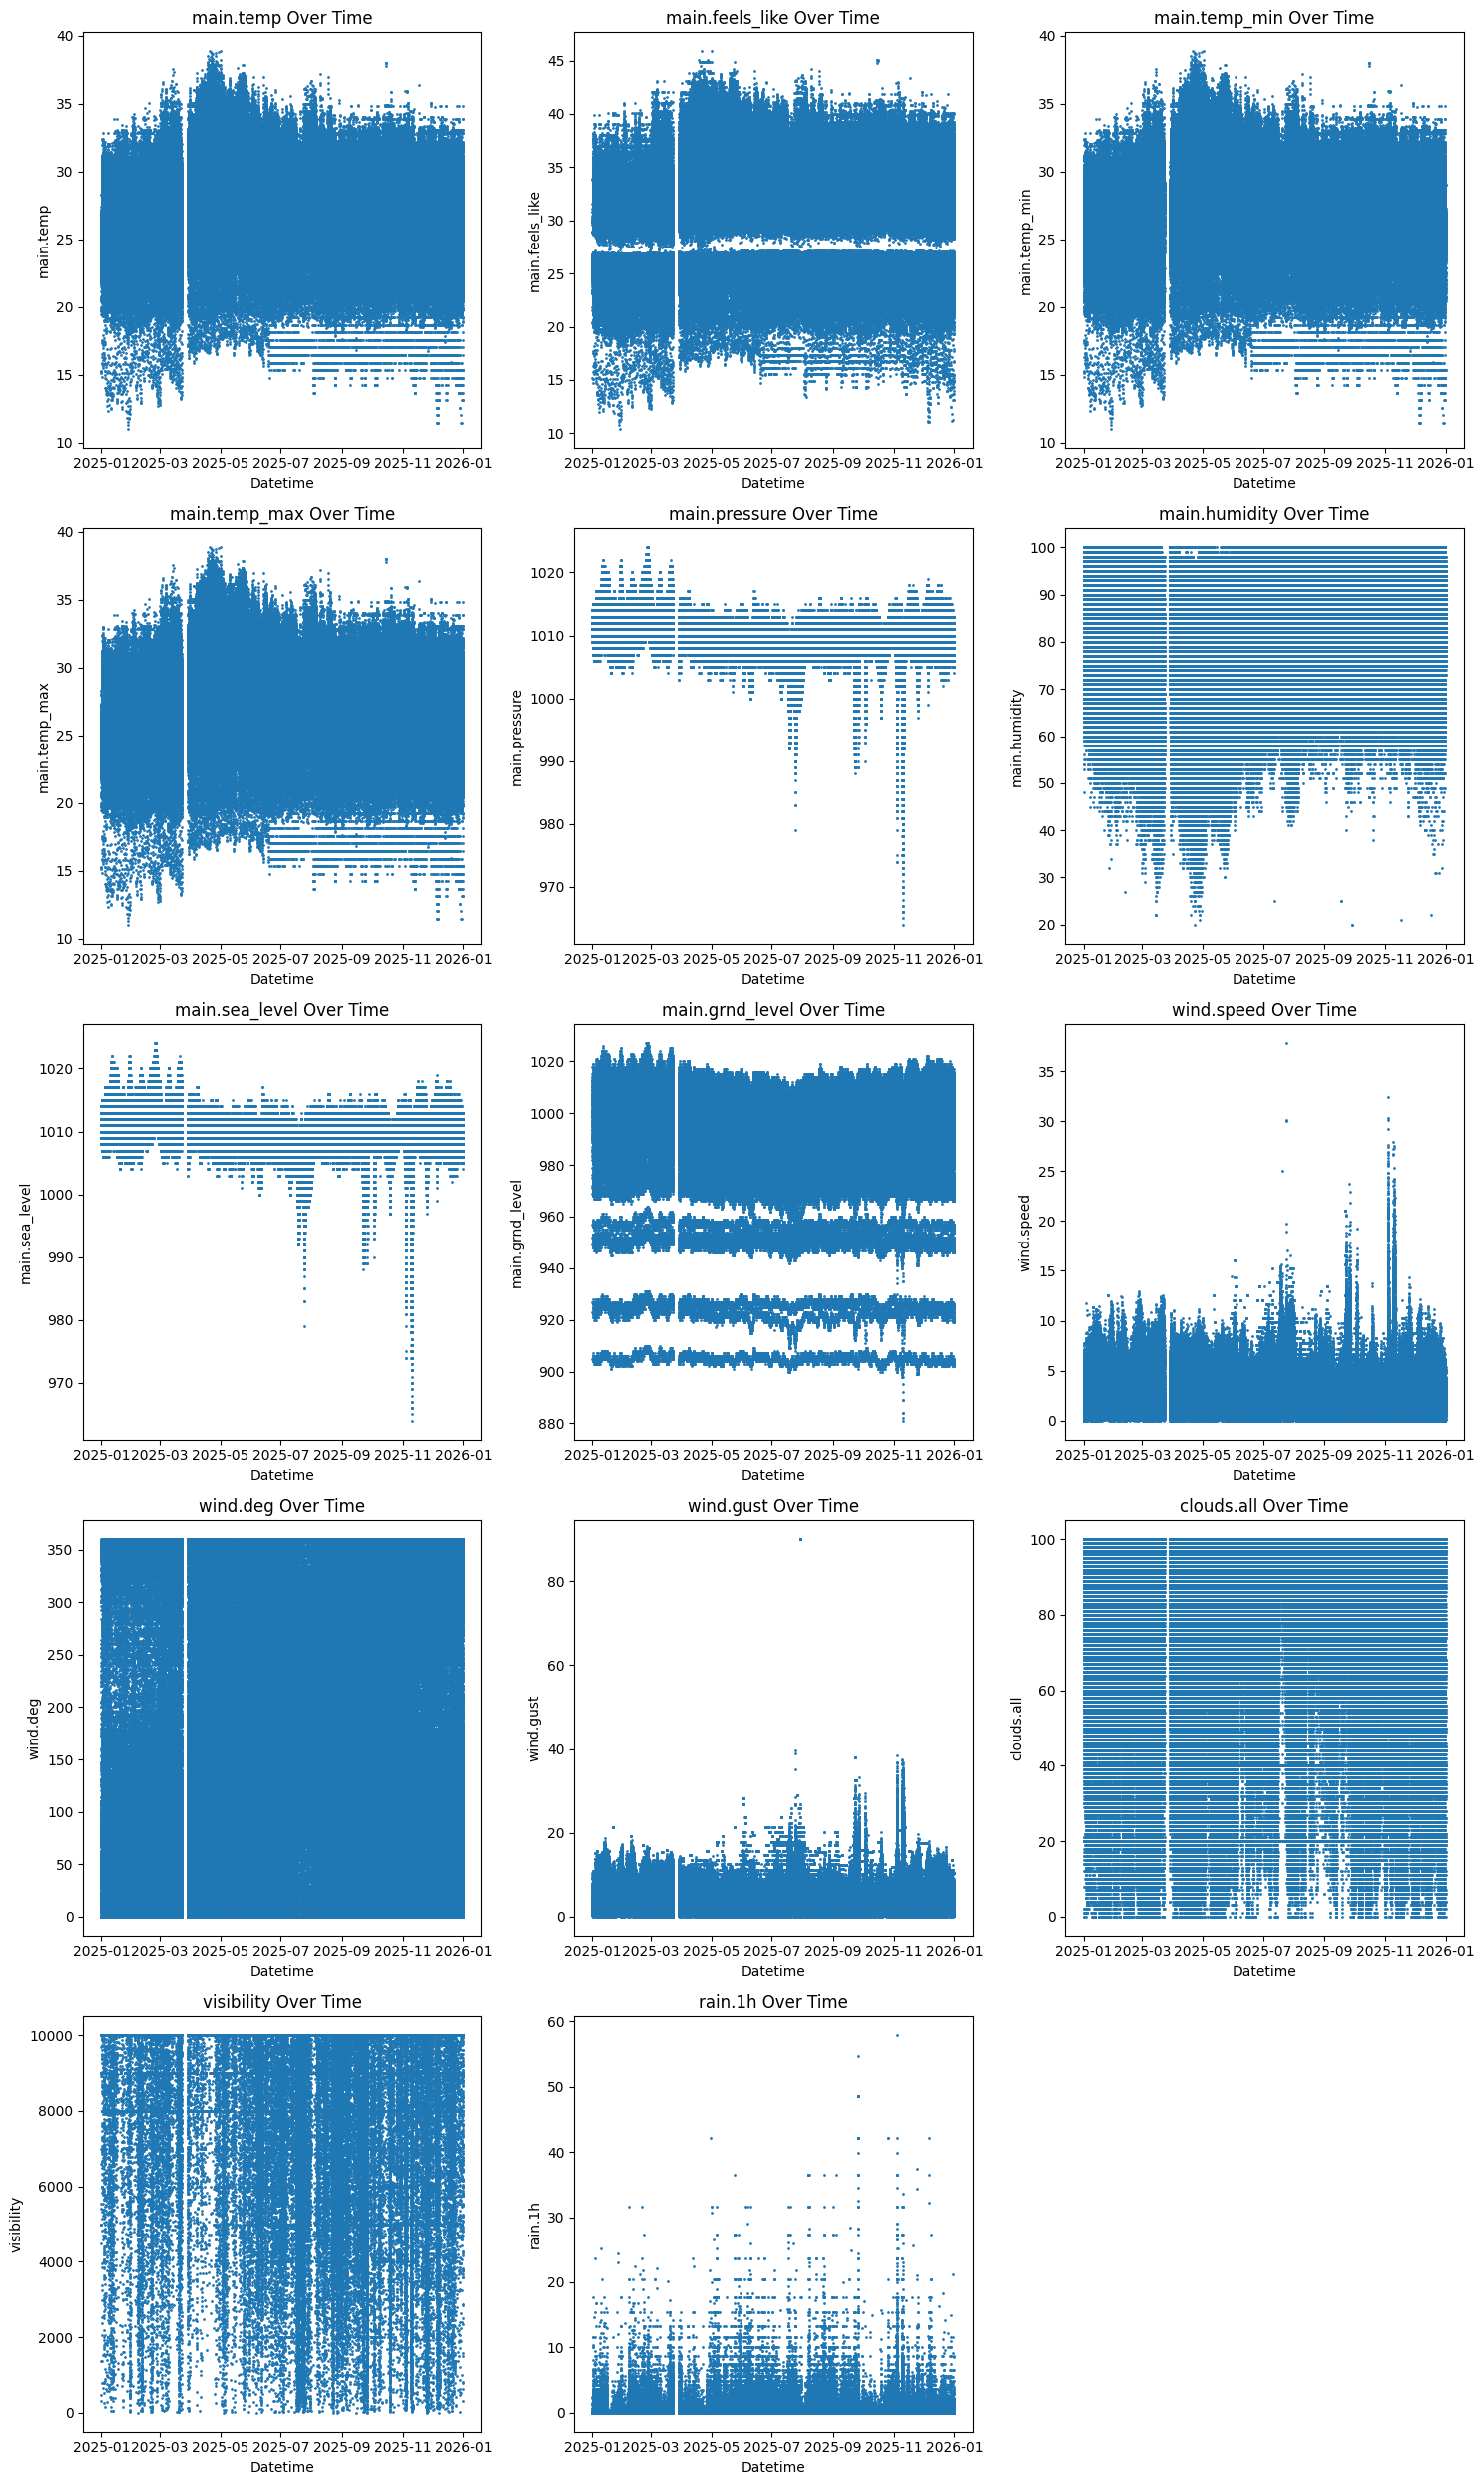

In [114]:
import matplotlib.pyplot as plt

num_plots = len(weather_signal_labels)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(weather_signal_labels):
    if i < num_plots:
        axes[i].scatter(weather_dataframe['datetime'], weather_dataframe[col], s=1)
        axes[i].set_title(f'{col} Over Time')
        axes[i].set_xlabel('Datetime')
        axes[i].set_ylabel(col)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

As seen from the scatter plots, all the graphs don't have any unreasonable outliers. Though there are some that are relatively higher than others, they are still within the upper boundaries of what is feasible.

We can do further checking to try and see more outliers within relationships of multiple variables.



---



### Relational Outliers




In [117]:
wind_relation_outliers = weather_dataframe['wind.gust'] > (
    weather_dataframe['wind.speed'] * 4
)
weather_dataframe[wind_relation_outliers]

,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h
1134,10000.0,2025-03-17 02:00:00+08:00,25.44,26.18,25.44,25.44,1010.0,82.0,1010.0,1004.0,0.07,188.0,0.90,59.0,2025-03-17 06:06:42+08:00,2025-03-17 18:10:22+08:00,Clouds,broken clouds,Alaminos,0.0
1222,10000.0,2025-03-20 20:00:00+08:00,25.86,26.41,25.86,25.86,1015.0,73.0,1015.0,1009.0,0.78,40.0,5.69,74.0,2025-03-20 06:04:25+08:00,2025-03-20 18:10:49+08:00,Clouds,broken clouds,Alaminos,0.0
1555,10000.0,2025-04-09 12:00:02+08:00,32.96,37.72,32.96,32.96,1010.0,55.0,1010.0,1004.0,0.66,106.0,2.90,64.0,2025-04-09 05:49:15+08:00,2025-04-09 18:13:46+08:00,Clouds,broken clouds,Alaminos,0.0
2195,10000.0,2025-05-06 22:00:01+08:00,27.61,31.54,27.61,27.61,1009.0,83.0,1009.0,1004.0,0.10,276.0,1.39,100.0,2025-05-06 05:33:23+08:00,2025-05-06 18:19:59+08:00,Clouds,overcast clouds,Alaminos,0.0
2233,10000.0,2025-05-08 14:00:00+08:00,32.74,38.19,32.74,32.74,1006.0,58.0,1006.0,1001.0,0.75,191.0,4.02,92.0,2025-05-08 05:32:34+08:00,2025-05-08 18:20:36+08:00,Clouds,overcast clouds,Alaminos,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066562,10000.0,2025-12-29 07:04:21+08:00,24.99,25.84,24.99,24.99,1009.0,88.0,1009.0,986.0,0.51,0.0,2.27,75.0,2025-12-29 06:01:47+08:00,2025-12-29 17:45:12+08:00,Clouds,broken clouds,Zamboanga City,0.0
1066577,10000.0,2025-12-29 22:04:18+08:00,25.99,25.99,25.99,25.99,1010.0,94.0,1010.0,986.0,0.51,0.0,2.27,75.0,2025-12-29 06:01:47+08:00,2025-12-29 17:45:12+08:00,Clouds,broken clouds,Zamboanga City,0.0
1066579,10000.0,2025-12-30 00:04:13+08:00,25.99,25.99,25.99,25.99,1010.0,94.0,1010.0,986.0,0.00,0.0,1.45,75.0,2025-12-30 06:02:13+08:00,2025-12-30 17:45:42+08:00,Clouds,broken clouds,Zamboanga City,0.0
1066585,10000.0,2025-12-30 06:04:05+08:00,24.99,26.00,24.99,24.99,1008.0,94.0,1008.0,985.0,0.51,0.0,3.46,75.0,2025-12-30 06:02:13+08:00,2025-12-30 17:45:42+08:00,Clouds,broken clouds,Zamboanga City,0.0


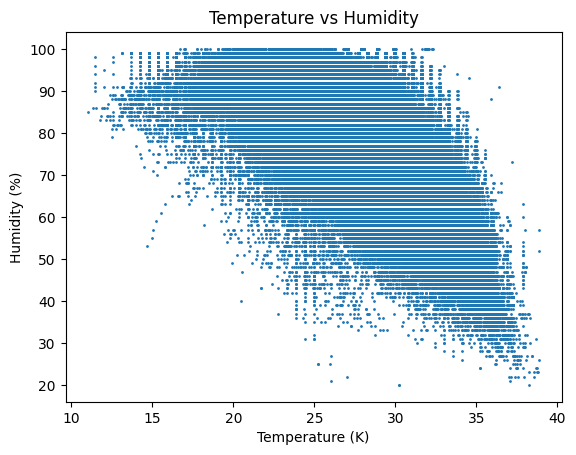

In [93]:
plt.figure()
plt.scatter(weather_dataframe['main.temp'], weather_dataframe['main.humidity'], s=1)
plt.xlabel('Temperature (K)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity')
plt.show()

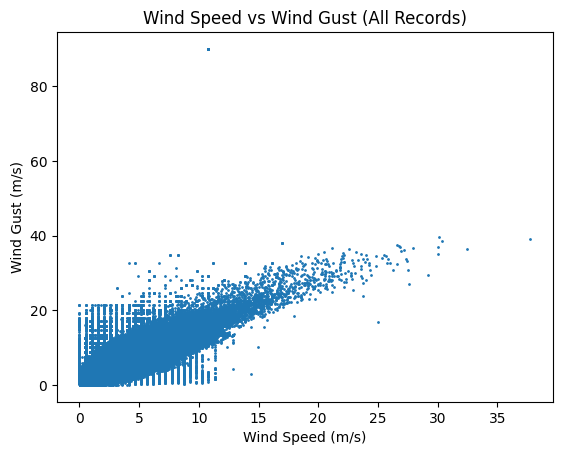

In [119]:
plt.figure()
plt.scatter(
    weather_dataframe['wind.speed'],
    weather_dataframe['wind.gust'],
    s=1
)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Wind Gust (m/s)")
plt.title("Wind Speed vs Wind Gust (All Records)")
plt.show()


In [135]:
weather_dataframe[((weather_dataframe['wind.gust'] > 80) & (weather_dataframe['wind.speed'] > 10))]

,visibility,datetime,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.main,weather.description,city_name,rain.1h
34534,10000.0,2025-07-29 15:00:06+08:00,32.24,39.24,31.72,32.87,1004.0,66.0,1004.0,1002.0,10.8,260.0,90.0,40.0,2025-07-29 05:38:53+08:00,2025-07-29 18:26:25+08:00,Clouds,scattered clouds,Bacoor,0.0
119400,10000.0,2025-07-29 15:00:27+08:00,32.08,39.08,31.70,32.86,1005.0,66.0,1005.0,993.0,10.8,260.0,90.0,40.0,2025-07-29 05:38:27+08:00,2025-07-29 18:25:39+08:00,Clouds,scattered clouds,Biñan,0.0
218857,10000.0,2025-07-29 15:00:54+08:00,31.99,38.97,31.71,32.86,1005.0,66.0,1005.0,1007.0,10.8,260.0,90.0,40.0,2025-07-29 05:38:27+08:00,2025-07-29 18:26:33+08:00,Clouds,scattered clouds,Caloocan City,0.0
273151,10000.0,2025-07-29 15:01:07+08:00,32.08,39.08,31.73,32.32,1004.0,67.0,1004.0,1005.0,10.8,260.0,90.0,40.0,2025-07-29 05:38:54+08:00,2025-07-29 18:26:30+08:00,Clouds,scattered clouds,Cavite City,0.0
286980,10000.0,2025-07-29 15:01:10+08:00,31.71,38.71,31.66,32.26,1005.0,68.0,1005.0,997.0,10.8,260.0,90.0,40.0,2025-07-29 05:37:57+08:00,2025-07-29 18:26:00+08:00,Clouds,scattered clouds,City of Marikina,0.0
464028,10000.0,2025-07-29 15:01:56+08:00,32.18,39.18,31.68,32.84,1005.0,67.0,1005.0,999.0,10.8,260.0,90.0,40.0,2025-07-29 05:38:54+08:00,2025-07-29 18:26:21+08:00,Clouds,scattered clouds,Imus,0.0
595690,10000.0,2025-07-29 15:01:28+08:00,31.97,38.97,31.59,32.18,1005.0,67.0,1005.0,1004.0,10.8,260.0,90.0,40.0,2025-07-29 05:38:20+08:00,2025-07-29 18:26:08+08:00,Clouds,scattered clouds,Makati City,0.0
626624,10000.0,2025-07-29 15:02:33+08:00,31.88,38.88,31.59,32.75,1005.0,67.0,1005.0,1004.0,10.8,260.0,90.0,40.0,2025-07-29 05:38:15+08:00,2025-07-29 18:26:09+08:00,Clouds,scattered clouds,Mandaluyong City,0.0
641461,10000.0,2025-07-29 15:02:37+08:00,32.07,39.07,31.68,32.84,1005.0,67.0,1005.0,1007.0,10.8,260.0,90.0,40.0,2025-07-29 05:38:28+08:00,2025-07-29 18:26:25+08:00,Clouds,scattered clouds,Manila,0.0
687671,10000.0,2025-07-29 15:02:47+08:00,31.99,38.99,31.71,32.86,1005.0,67.0,1005.0,1009.0,10.8,260.0,90.0,40.0,2025-07-29 05:38:30+08:00,2025-07-29 18:26:39+08:00,Clouds,scattered clouds,Navotas,0.0


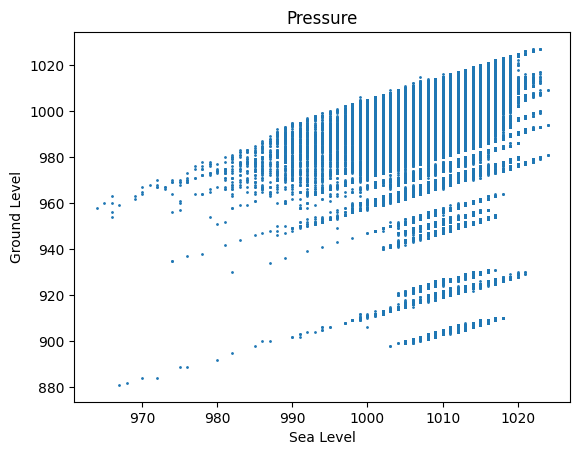

In [136]:

plt.figure()
plt.scatter(weather_dataframe['main.sea_level'], weather_dataframe['main.grnd_level'], s=1)
plt.xlabel('Sea Level')
plt.ylabel('Ground Level')
plt.title('Pressure')
plt.show()

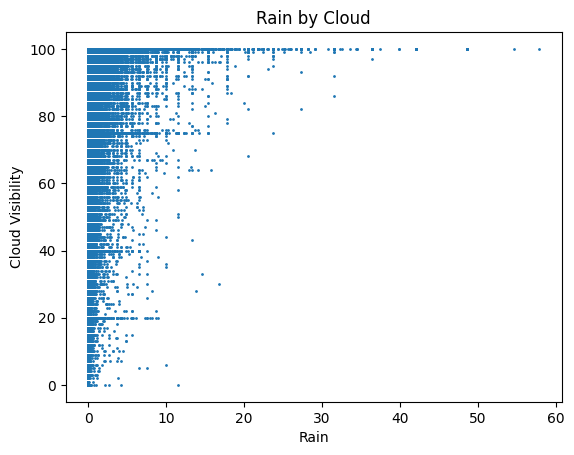

In [138]:

plt.figure()
plt.scatter(weather_dataframe['rain.1h'], weather_dataframe['clouds.all'], s=1)
plt.xlabel('Rain')
plt.ylabel('Cloud Visibility')
plt.title('Rain by Cloud')
plt.show()

NEXT:

In [118]:
weather_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066627 entries, 0 to 1066626
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype                    
---  ------               --------------    -----                    
 0   visibility           1066627 non-null  float64                  
 1   datetime             1066627 non-null  datetime64[ns, UTC+08:00]
 2   main.temp            1066627 non-null  float64                  
 3   main.feels_like      1066627 non-null  float64                  
 4   main.temp_min        1066627 non-null  float64                  
 5   main.temp_max        1066627 non-null  float64                  
 6   main.pressure        1066627 non-null  float64                  
 7   main.humidity        1066627 non-null  float64                  
 8   main.sea_level       1066627 non-null  float64                  
 9   main.grnd_level      1066627 non-null  float64                  
 10  wind.speed           1066627 non-null  flo

# New Section



TOMORROW
CHECK LINEAR INTERPOLATION
LOOK FOR IRREGULARITIES